<a href="https://www.kaggle.com/code/pranitpravinsawant/notebook630a3f93a7?scriptVersionId=131205595" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voice-call-customer-experience-data/voice call quality customer experience(mycall app jan 2022) data.gov.in.csv


In [2]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data
df=pd.read_csv(os.path.join(dirname, filename))
df.head(3)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.0,-1.0,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.0,-1.0,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.0,-1.0,NA


## To explore data through descriptive statistics and other measures

In [4]:
df.isnull().sum()

operator             0
inout_travelling     0
network_type         0
rating               0
calldrop_category    0
latitude             0
longitude            0
state_name           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           620 non-null    object 
 1   inout_travelling   620 non-null    object 
 2   network_type       620 non-null    object 
 3   rating             620 non-null    int64  
 4   calldrop_category  620 non-null    object 
 5   latitude           620 non-null    float64
 6   longitude          620 non-null    float64
 7   state_name         620 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 38.9+ KB


In [6]:
df.describe()

,rating,latitude,longitude
count,620.000000,620.000000,620.000000
mean,3.254839,8.184035,32.003883
std,1.660982,11.050004,38.790740
min,1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000
75%,5.000000,21.123070,77.437907
max,5.000000,29.393717,88.551240


In [7]:
print(list(df.columns))

['operator', 'inout_travelling', 'network_type', 'rating', 'calldrop_category', 'latitude', 'longitude', 'state_name']


In [8]:
df.operator.unique()

array(['BSNL', 'RJio', 'VI', 'Airtel', 'MTNL'], dtype=object)

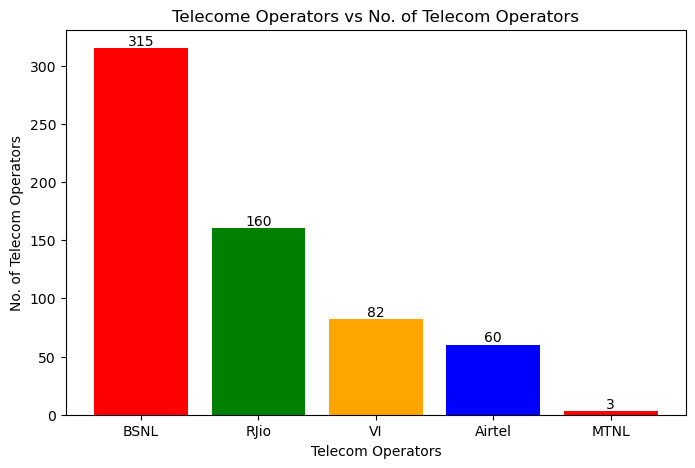

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
bars=ax.bar(df.operator.unique(),df.operator.value_counts().values,color=['red','green','orange','blue'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')
plt.xlabel('Telecom Operators')
plt.ylabel('No. of Telecom Operators')
plt.title('Telecome Operators vs No. of Telecom Operators')
plt.show()

In [10]:
df.calldrop_category.unique()

array(['Satisfactory', 'Poor Voice Quality', 'Call Dropped'], dtype=object)

In [11]:
df.groupby('operator')['calldrop_category'].value_counts()

operator  calldrop_category 
Airtel    Satisfactory           40
          Poor Voice Quality     32
          Call Dropped           10
BSNL      Call Dropped           23
          Poor Voice Quality     22
          Satisfactory           15
MTNL      Call Dropped            1
          Poor Voice Quality      1
          Satisfactory            1
RJio      Satisfactory          109
          Poor Voice Quality     27
          Call Dropped           24
VI        Satisfactory          232
          Poor Voice Quality     60
          Call Dropped           23
Name: calldrop_category, dtype: int64

In [12]:
df.state_name.value_counts()

NA                359
Maharashtra       128
Madhya Pradesh     67
Karnataka          24
Jharkhand          13
Delhi               8
Gujarat             7
Kerala              5
West Bengal         4
Uttarakhand         2
Chhattisgarh        1
Uttar Pradesh       1
Tamil Nadu          1
Name: state_name, dtype: int64

In [13]:
df['state_name']=df['state_name'].replace({'NA ':'Others'})
df.head(3)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.0,-1.0,Others
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.0,-1.0,Others
2,BSNL,Indoor,2G,3,Satisfactory,-1.0,-1.0,Others


In [14]:
df.state_name.value_counts()

Others            359
Maharashtra       128
Madhya Pradesh     67
Karnataka          24
Jharkhand          13
Delhi               8
Gujarat             7
Kerala              5
West Bengal         4
Uttarakhand         2
Chhattisgarh        1
Uttar Pradesh       1
Tamil Nadu          1
Name: state_name, dtype: int64

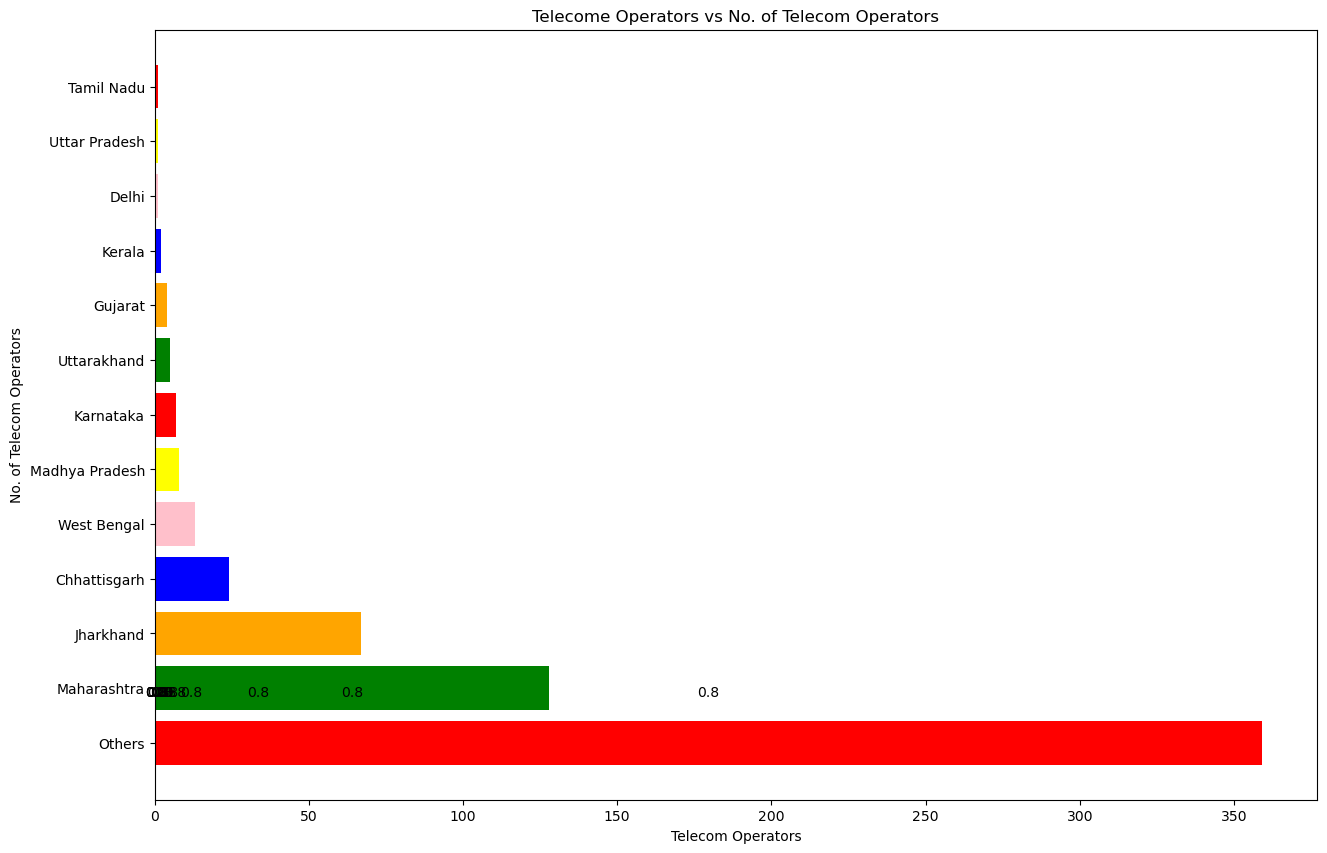

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
bars=ax.barh(df.state_name.unique(),df.state_name.value_counts().values,color=['red','green','orange','blue','pink','yellow'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')
plt.xlabel('Telecom Operators')
plt.ylabel('No. of Telecom Operators')
plt.title('Telecome Operators vs No. of Telecom Operators')
plt.show()

<Axes: title={'center': 'VI'}>

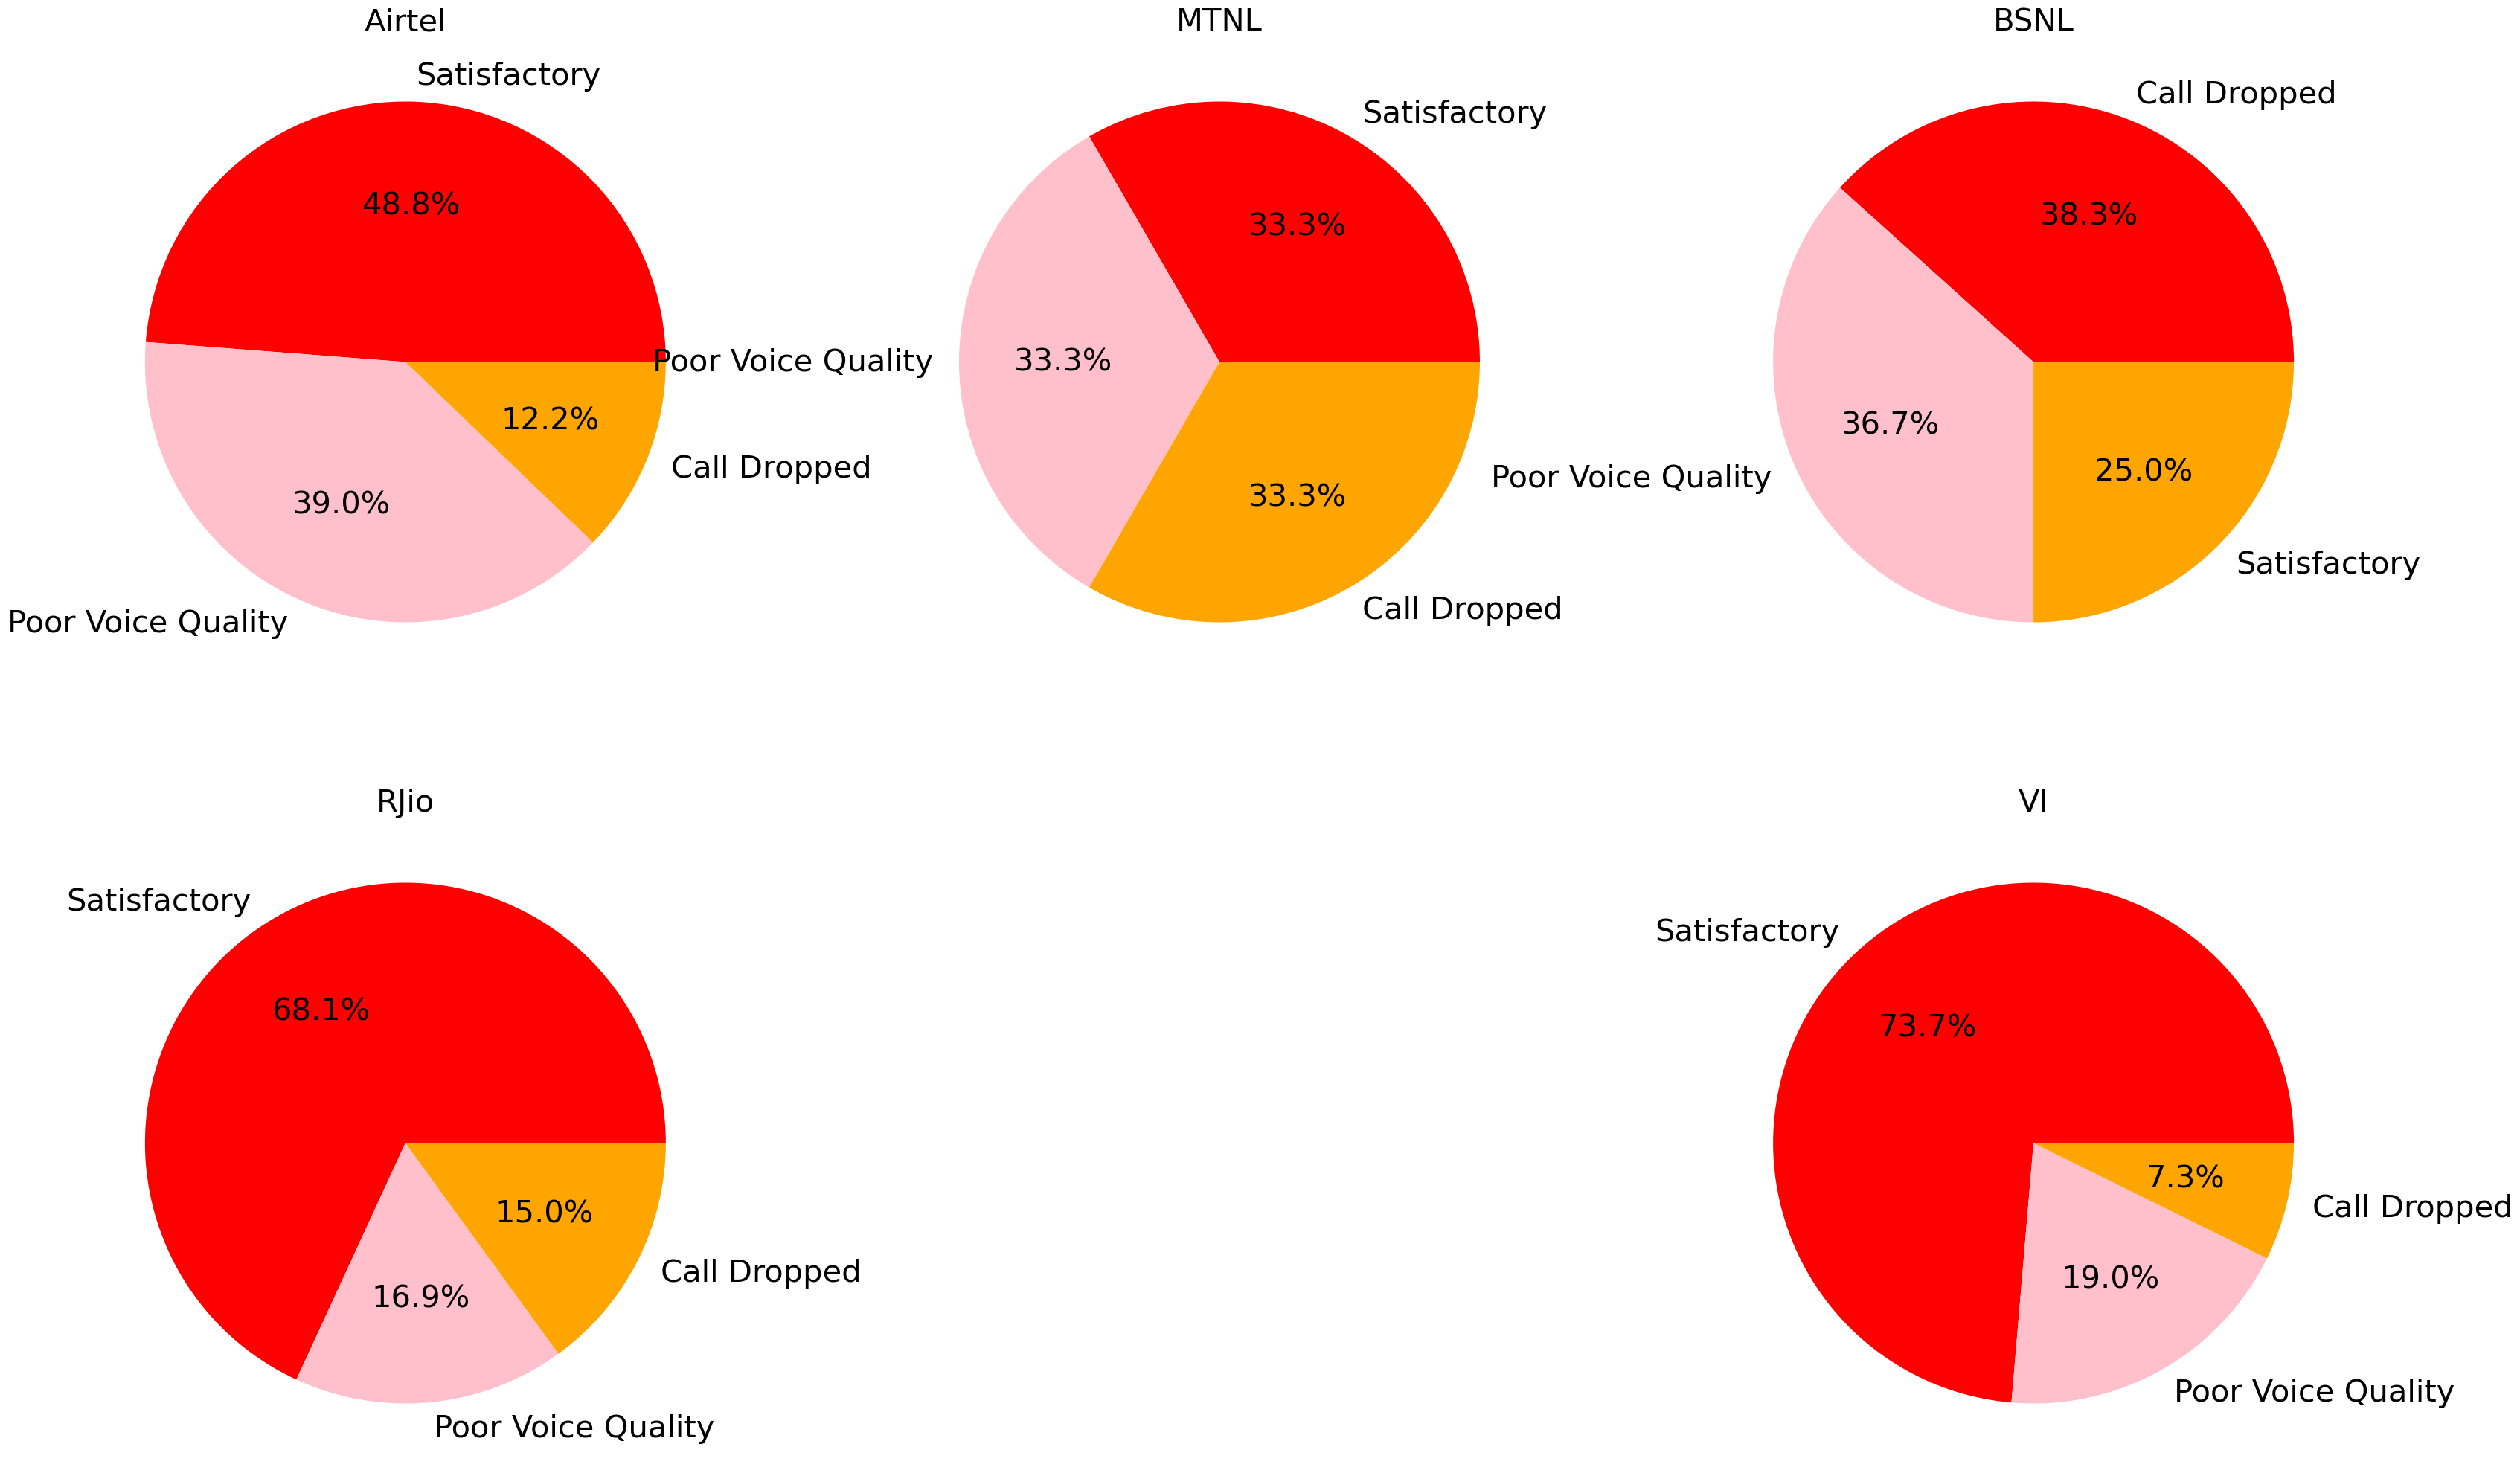

In [16]:
plt.figure(figsize=(40,25))
order=('Satisfactory', 'Poor Voice Quality', 'Call Dropped')
my_col=['red','pink','orange']

plt.subplot(2,3,1)
plt.title('Airtel', fontdict={'fontsize':30})
df['calldrop_category'].loc[df['operator'] == 'Airtel'].value_counts().plot(kind='pie', colors=my_col, fontsize = 30, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,3)
plt.title('BSNL', fontdict={'fontsize':30})
df['calldrop_category'].loc[df['operator'] == 'BSNL'].value_counts().plot(kind='pie', colors=my_col, fontsize = 30, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,2)
plt.title('MTNL', fontdict={'fontsize':30})
df['calldrop_category'].loc[df['operator'] == 'MTNL'].value_counts().plot(kind='pie', colors=my_col, fontsize = 30, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,4)
plt.title('RJio', fontdict={'fontsize':30})
df['calldrop_category'].loc[df['operator'] == 'RJio'].value_counts().plot(kind='pie', colors=my_col, fontsize = 30, legend=None, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,6)
plt.title('VI', fontdict={'fontsize':30})
df['calldrop_category'].loc[df['operator'] == 'VI'].value_counts().plot(kind='pie', colors=my_col, fontsize = 30, legend=None, ylabel='', autopct='%1.1f%%')
